In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator



In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
print(train_images.shape)
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)
print(train_images.shape) # (60000, 784)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000, 28, 28, 1)


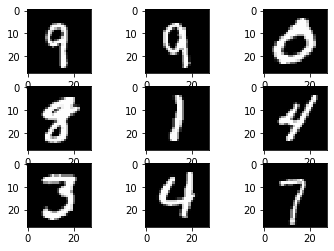

In [0]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(train_images)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(train_images, train_labels, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

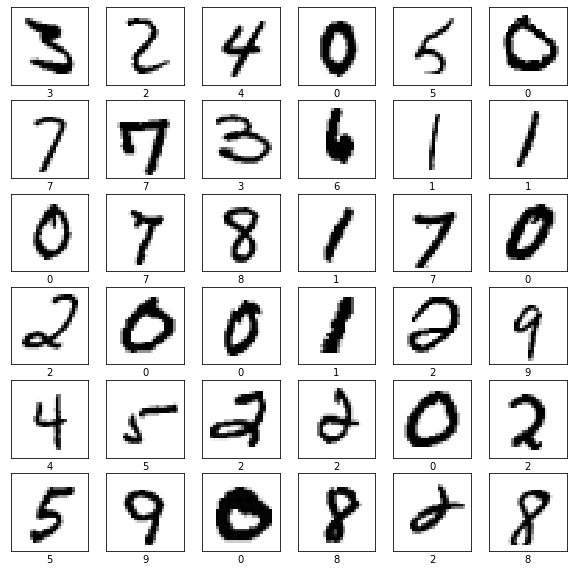

In [0]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      Dense(64, activation='relu', input_shape=(784,)),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax'),
  ])
  return fc_model

In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
def build_cnn_model():
    cnn_model = tf.keras.Sequential()
    cnn_model.add(Conv2D(24, kernel_size=(3, 3), activation='tanh', input_shape=input_shape))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(36, (3, 3), activation='tanh'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    #cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='tanh'))
    #cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(num_classes, activation='softmax'))
    return cnn_model

In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
def build_cnn_model3():
    cnn_model = tf.keras.Sequential()
    cnn_model.add(Conv2D(8, kernel_size=(3, 3),activity_regularizer=tf.keras.regularizers.l2(l=0.01),activation='relu',input_shape=input_shape))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128,kernel_regularizer=tf.keras.regularizers.l2(l=0.01),activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(num_classes, activation='softmax'))
    return cnn_model
    model = Sequential()

In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
def build_cnn_model4():
    cnn_model = tf.keras.Sequential()
    cnn_model.add(Conv2D(8, kernel_size=(3, 3),activity_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),activation='relu',input_shape=input_shape))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128,kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(num_classes, activation='softmax'))
    return cnn_model
    model = Sequential()

In [0]:
num_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
def build_cnn_model2():
    cnn_model = tf.keras.Sequential()
    cnn_model.add(Conv2D(32, kernel_size=(3, 3),activity_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),activation='relu',input_shape=input_shape))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128,kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01),activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(num_classes, activation='softmax'))
    return cnn_model
    model = Sequential()

In [0]:
model = build_fc_model()
BATCH_SIZE = 32
EPOCHS = 5
# TODO compile and fit the model with the appropriate parameters.
optAdaMax = tf.keras.optimizers.Adamax(learning_rate=0.5, beta_1=0.9, beta_2=0.999)
optAdam = tf.keras.optimizers.Adam(learning_rate=0.5, beta_1=0.9, beta_2=0.999, amsgrad=False)
opt1 = tf.keras.optimizers.Adagrad(learning_rate=0.5)
opt2 = tf.keras.optimizers.RMSprop(learning_rate=0.5, rho=0.9)
opt3 = tf.keras.optimizers.SGD(learning_rate=0.5, momentum=0.0, nesterov=False)


model.compile(
  optimizer= opt2,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#TODO: Use the evaluate method to test the model.
model.fit(
  train_images, # training data
  to_categorical(train_labels), # training targets
  epochs=EPOCHS,
  batch_size=BATCH_SIZE,
)
test_acc =model.evaluate(test_images,to_categorical(test_labels))
print('Test accuracy:', test_acc)



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 34.6707 - accuracy: 0.1028
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 2.4281 - accuracy: 0.1010
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 2.3832 - accuracy: 0.1014
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3828 - accuracy: 0.1013
Epoch 5/5
10000/10000 [==============================] - 0s 44us/sample - loss: 2.3959 - accuracy: 0.0975
Test accuracy: [2.3959102264404297, 0.0975]


In [0]:
cnn_model = build_cnn_model3()
print(cnn_model.summary())
BATCH_SIZE = 32
EPOCHS = 5
#TODO: Compile and fit the CNN model.

cnn_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

cnn_model.fit(train_images, to_categorical(train_labels),
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(test_images, to_categorical(test_labels)))

#TODO: Use the evaluate method to test the model.
loss,test_acc = cnn_model.evaluate(test_images, to_categorical(test_labels), verbose=0)
print('Test accuracy:', test_acc)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        4672      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

[1.7236664e-03 1.4563964e-03 4.7135525e-03 1.8698642e-02 7.2118002e-03
 1.6609458e-03 7.4749195e-04 9.1840947e-01 1.0439019e-02 3.4939151e-02]
arg max 7


7

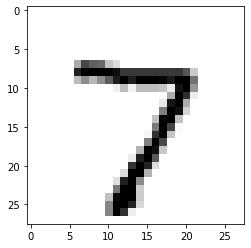

In [0]:
predictions = cnn_model.predict(test_images)
print(predictions[0])
predictions[0]

#TODO: identify the digit with the highest confidence prediction for the first image in the test dataset
plt.imshow(np.squeeze(test_images[0]), cmap=plt.cm.binary)
#plt.xlabel(train_labels[image_ind])
# Print our model's predictions.
print("arg max" , np.argmax(predictions[0])) 

test_labels[0]